# Measuring the increase of melancholic songs in 2020


## Overview

With this project our goal is to formally quantify if music has seen a shift into a more 'sadder' tone for the year 2020 compared to other years. Our team decided to analyze a spotify dataset that contained values across many years in order to compare 2020 with other years. We found out that variables such as valence, mode, and explicitness are key factors in songs that represent 'sad' characteristics. Our results indicate that there is a clear shift toward sadder music in these variables from other years leading into 2020.




## Research question

During 2020 and the pandemic was there a significant increase in 'sad' songs compared to years prior?


## Background and Prior Work 
The corona pandemic in 2020 had a strong influence on peoples life aspects for the major part in a negative way. Individuals were experiencing loss of loved ones, along with spending much more time alone and at home. Music is often related to the current events going on in the world, and we are interested to see how the pandemic has impacted the songs produced in 2020.  In the past, music has been reflective of the hard times individuals in society face. One example is the Vietnam War. During the war, "music began to reflect anti-war sentiment and a painfully true commentary on the war’s effects on both soldiers and those still at home"(1). We are interested in looking at if the music produced in 2020 is different than years prior during the pandemic.  While music is often similar to what is going on in society, it also serves as a coping mechanism and an escape from reality. Thus during hard times, positive music may be used to lift people's spirits. Although during the Vietnam War and World War II music was reflective of society at the time, in more recent years as a result of technological advancements, music serves as a sense of comfort for individuals and as a way to "cope and deal with the stress of war"(2).  We are interested in looking at whether the songs produced in 2020 were more or less "sad" than years prior. "Sad" songs can be characterized by traits including Mode, Tempo, Beat, and lyrics. Using these aspects once can define a song as generally following a sad tone(3). In addition, the trait of valence can be described as the "musical positiveness conveyed by a track. Tracks wit high valence sound more positive... while tracks with low valence sound more negative" (5).  There has been some research done on the correlation between the individual genres and 2020, and there was no significant correlation (4). Besides this, there is not much research done on the difference in popular music in 2020 compared to years prior and how covid may have played a role in it.


## Hypothesis

We hypothesize that there is a increase in "sad" songs produced in 2020 compared to years prior, determined by characteristics of a song including the valence, explicitness, and mode.
## Dataset

We need the data set to show the release dates of the songs for sure. The popularity of the songs and relevance would help us further account for the importance of some songs over others and view trends in the most popular songs. Perhaps another important aspect is how the data will represent the characteristics of the sogns like: livliness, energy, exlicity, beat, etc. If we could get a large dataset with all of the information we have then we could produce great results.

[Spotify dataset 1921-2020 160k tracks](https://www.kaggle.com/datasets/ektanegi/spotifydata-19212020?resource=download)

number of observations 172230 This is a massive dataset describing many songs currently on spotify, spanning songs released from 1921-2020 more importantly, this dataset has many important measurements of features present in each song such as: tempo, acousticness, loudness, etc. which will be very helpful to determining if a song is positive or negative

We will also be looking at this [figure](https://www.researchgate.net/figure/Characteristics-of-happy-sad-activating-and-relaxing-music-This-systematized_fig1_254664268) as a way to guide our decision making as to whether a song is happy/sad positive/negative

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
from scipy.stats import ttest_ind, chisquare, normaltest

## Data Cleaning

In [4]:
dataset = pd.read_csv("spotifydata.csv")
dataset

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [7]:
clean_dataset = dataset[~ dataset['name'].str.contains('Live at')]
clean_dataset = clean_dataset.sort_values(by = 'year', ascending = False)

clean_df = clean_dataset.drop(['id', 'release_date'], axis = 1)
clean_df = clean_df.drop_duplicates()

In the cell above we loaded the .csv file, containing data about every song released since 1920. We then cleaned the dataframe by sorting it by year ascending. This makes it easier to look at and follow. We removed the re-releases of songs preformed live by checking if a title contained the words "Live At" to determine if the song was a live re release from an old artist i.e. Frank Sinatra. On top of this, we dropped irrelevant columns such as "id" and "release_date". We don't need "release_date" because there is already a "year" column. Further, we dropped duplicates.

## Data Analysis & Results (EDA)





Each observation in the dataset is in a separate row and represents a unique song produced. We plan to group the songs produced in 2020 and compare the attributes in the columns to those songs with songs produced prior to 2020. Specifically we are interested in valence, energy, danceability, liveness, and loudness.

In the below segment we can see that from 1920 to 1960 there are fewer songs, because we are taking the average of years before 2020, this shouldn't be an issue.


1741

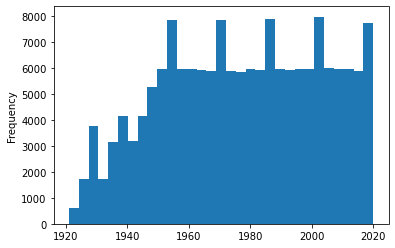

In [17]:
clean_df['year'].plot.hist(bins = 31)
len(clean_df[clean_df['year']==2020])

In [13]:
clean_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,168308.000000,168308.000000,1.683080e+05,168308.000000,168308.000000,168308.000000,168308.000000,168308.000000,168308.000000,168308.000000,168308.000000,168308.000000,168308.000000,168308.000000,168308.000000
mean,0.492188,0.539233,2.309504e+05,0.488907,0.085551,0.160598,5.199759,0.203658,-11.341773,0.708059,31.666160,0.094101,116.969574,0.533217,1977.330287
std,0.376491,0.175276,1.206642e+05,0.266981,0.279701,0.308191,3.514883,0.171655,5.650913,0.454657,21.587963,0.150239,30.725132,0.262357,25.604318
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.093775,0.418000,1.710270e+05,0.264000,0.000000,0.000000,2.000000,0.098200,-14.433000,0.000000,12.000000,0.034900,93.549750,0.324000,1957.000000
50%,0.490000,0.549000,2.083565e+05,0.481000,0.000000,0.000195,5.000000,0.135000,-10.450000,1.000000,34.000000,0.045000,114.807000,0.546000,1978.000000
75%,0.887000,0.668000,2.623732e+05,0.710000,0.000000,0.083200,8.000000,0.260000,-7.099000,1.000000,48.000000,0.075300,135.721000,0.751000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000
